# Exercício Avaliativo – Algoritmos de Busca (BFS x A*)

## Cenário

Vocês são engenheiros de software responsáveis por programar um robô que
precisa atravessar uma cidade representada por um mapa fixo em grade
15x15.
O
robô deve ir do ponto inicial (0,0) (canto superior esquerdo) até o objetivo (14,14)
(canto inferior direito), desviando de obstáculos (#).
As células livres estão
marcadas com
(...)

# Tarefas a serem realizadas:

- Implementar dois algoritmos de busca no mapa:
- BFS (Busca em Largura – sem heurística)
- A* (com heurística Manhattan)
- Para cada mapa, responder:
- Existe caminho entre início e objetivo?
- Qual o número de passos do caminho mais curto?
- Quantos nós foram explorados no processo?
- Comparar BFS x A*:
- Algum foi mais rápido (menos nós explorados)?
- Algum não encontrou caminho?

Deve ser apresentado de forma visual o mapa para cada um dos cenários


Análise do Mapa A (22% obstáculos)

BFS (Busca em Largura):
  - Caminho encontrado: Sim
  - Comprimento do caminho: 28 passos
  - Nós explorados: 174

A* (com heurística Manhattan):
  - Caminho encontrado: Sim
  - Comprimento do caminho: 28 passos
  - Nós explorados: 130

Comparação:
  - A* explorou 44 nós a menos que BFS
  - A* foi 25.3% mais eficiente
  - Ambos encontraram caminhos de mesmo comprimento: 28 passos


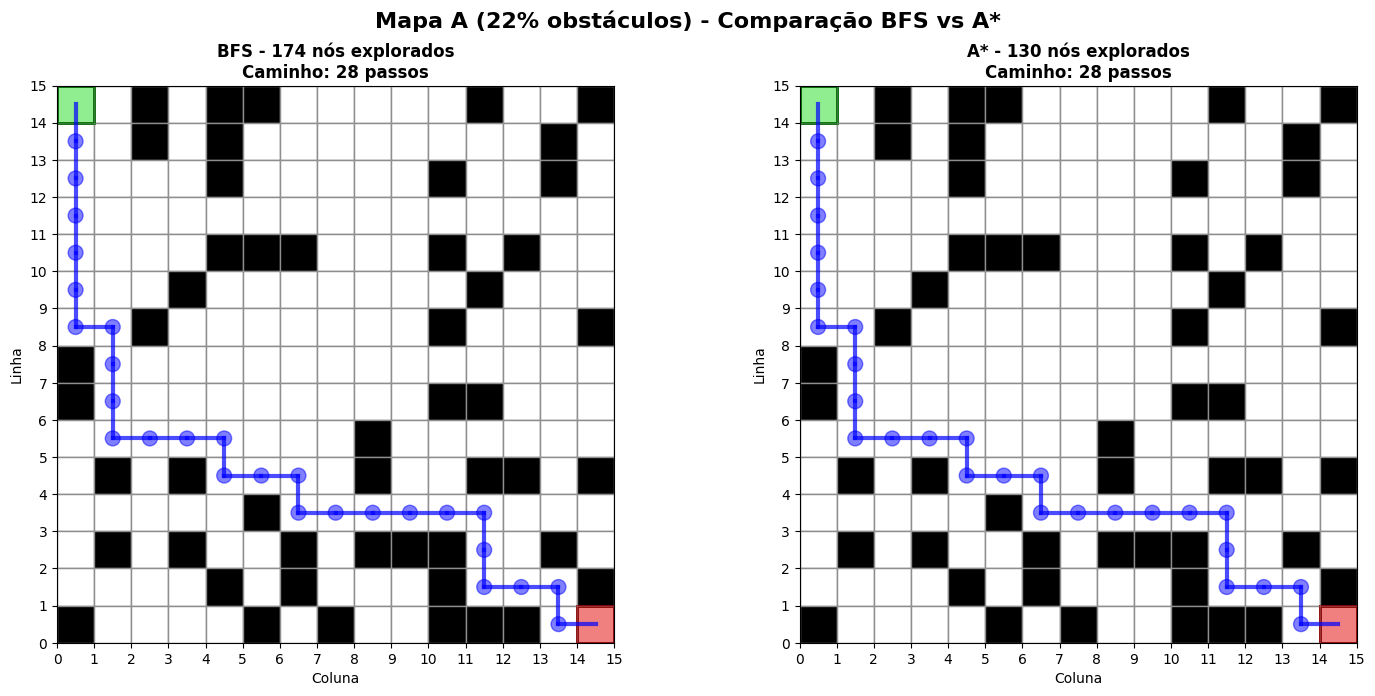


Análise do Mapa B (26% obstáculos)

BFS (Busca em Largura):
  - Caminho encontrado: Não
  - Nós explorados: 163

A* (com heurística Manhattan):
  - Caminho encontrado: Não
  - Nós explorados: 163

Comparação:
  - Nenhum algoritmo encontrou caminho


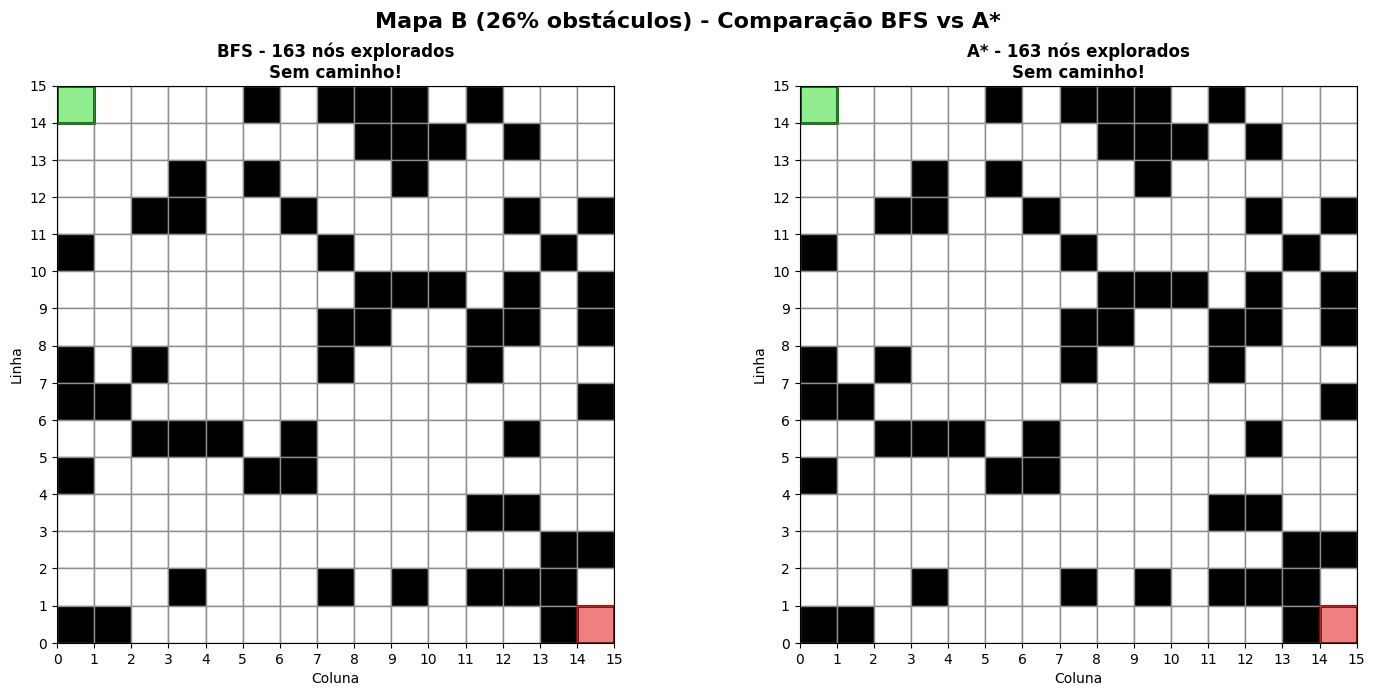


Análise do Mapa C (35% obstáculos)

BFS (Busca em Largura):
  - Caminho encontrado: Não
  - Nós explorados: 3

A* (com heurística Manhattan):
  - Caminho encontrado: Não
  - Nós explorados: 3

Comparação:
  - Nenhum algoritmo encontrou caminho


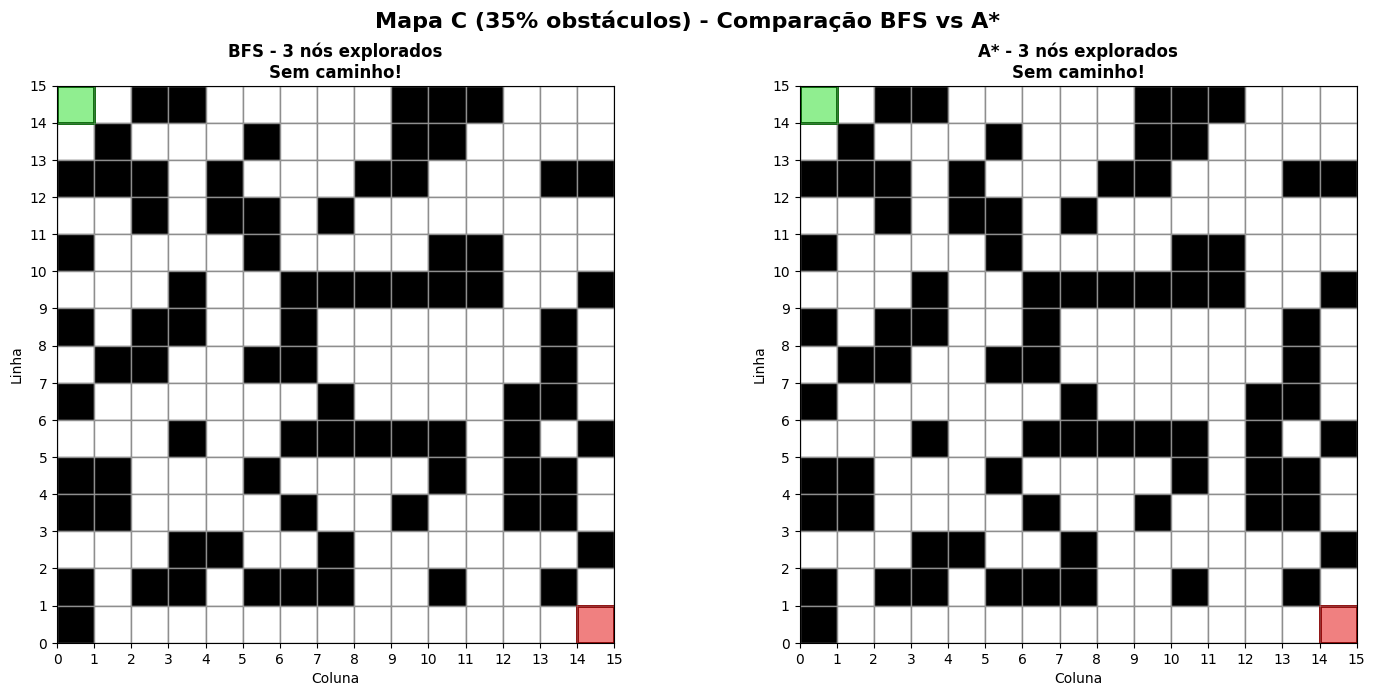

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque
import heapq
import numpy as np

class MazeRobot:
    """Classe principal para navegação do robô em mapas 15x15"""
    
    def __init__(self, maze_string, name="Mapa"):
        """
        Inicializa o mapa a partir de uma string
        
        Args:
            maze_string: String contendo o mapa (# = obstáculo, . = livre)
            name: Nome do mapa para identificação
        """
        self.name = name
        self.maze = self._parse_maze(maze_string)
        self.rows = len(self.maze)
        self.cols = len(self.maze[0])
        self.start = (0, 0)  # Canto superior esquerdo
        self.goal = (14, 14)  # Canto inferior direito
        
    def _parse_maze(self, maze_string):
        """Converte a string do mapa em matriz 2D"""
        lines = maze_string.strip().split('\n')
        maze = []
        for line in lines:
            # Remove números de linha e espaços extras
            clean_line = line.split()[-1] if line.strip() else ""
            if clean_line:
                maze.append(list(clean_line))
        return maze
    
    def is_valid(self, row, col):
        """Verifica se uma posição é válida (dentro dos limites e não é obstáculo)"""
        return (0 <= row < self.rows and 
                0 <= col < self.cols and 
                self.maze[row][col] != '#')
    
    def get_neighbors(self, pos):
        """Retorna vizinhos válidos de uma posição (movimento em 4 direções)"""
        row, col = pos
        neighbors = []
        # Cima, Baixo, Esquerda, Direita
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        
        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            if self.is_valid(new_row, new_col):
                neighbors.append((new_row, new_col))
        
        return neighbors
    
    def bfs(self):
        """
        Busca em Largura (BFS) - sem heurística
        
        Returns:
            tuple: (caminho, nós_explorados) ou (None, nós_explorados) se não houver caminho
        """
        # Fila para BFS
        queue = deque([self.start])
        # Dicionário para rastrear de onde viemos
        came_from = {self.start: None}
        # Contador de nós explorados
        nodes_explored = 0
        
        while queue:
            current = queue.popleft()
            nodes_explored += 1
            
            # Se chegamos ao objetivo
            if current == self.goal:
                # Reconstrói o caminho
                path = []
                while current is not None:
                    path.append(current)
                    current = came_from[current]
                path.reverse()
                return path, nodes_explored
            
            # Explora vizinhos
            for neighbor in self.get_neighbors(current):
                if neighbor not in came_from:
                    came_from[neighbor] = current
                    queue.append(neighbor)
        
        # Não encontrou caminho
        return None, nodes_explored
    
    def manhattan_distance(self, pos1, pos2):
        """Calcula distância Manhattan entre duas posições (heurística para A*)"""
        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])
    
    def a_star(self):
        """
        Algoritmo A* com heurística Manhattan
        
        Returns:
            tuple: (caminho, nós_explorados) ou (None, nós_explorados) se não houver caminho
        """
        # Heap priority queue: (f_score, contador, posição)
        # Contador usado para desempate mantendo ordem de inserção
        counter = 0
        open_set = [(0, counter, self.start)]
        
        # g_score: custo real do início até cada nó
        g_score = {self.start: 0}
        
        # f_score: g_score + heurística
        f_score = {self.start: self.manhattan_distance(self.start, self.goal)}
        
        # Para reconstruir o caminho
        came_from = {}
        
        # Conjunto de nós já explorados
        closed_set = set()
        
        nodes_explored = 0
        
        while open_set:
            # Pega o nó com menor f_score
            _, _, current = heapq.heappop(open_set)
            
            if current in closed_set:
                continue
                
            closed_set.add(current)
            nodes_explored += 1
            
            # Se chegamos ao objetivo
            if current == self.goal:
                # Reconstrói o caminho
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                path.append(self.start)
                path.reverse()
                return path, nodes_explored
            
            # Explora vizinhos
            for neighbor in self.get_neighbors(current):
                if neighbor in closed_set:
                    continue
                
                # Custo para chegar ao vizinho (todos os movimentos custam 1)
                tentative_g_score = g_score[current] + 1
                
                # Se encontramos um caminho melhor para o vizinho
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + self.manhattan_distance(neighbor, self.goal)
                    counter += 1
                    heapq.heappush(open_set, (f_score[neighbor], counter, neighbor))
        
        # Não encontrou caminho
        return None, nodes_explored
    
    def visualize(self, path_bfs=None, path_astar=None, explored_bfs=0, explored_astar=0):
        """Visualiza o mapa com os caminhos encontrados"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
        
        # Configuração comum para ambos os subplots
        for ax, path, title in [(ax1, path_bfs, f"BFS - {explored_bfs} nós explorados"),
                                (ax2, path_astar, f"A* - {explored_astar} nós explorados")]:
            
            # Grade do mapa
            for i in range(self.rows):
                for j in range(self.cols):
                    if self.maze[i][j] == '#':
                        # Obstáculos em preto
                        rect = patches.Rectangle((j, self.rows-1-i), 1, 1, 
                                               linewidth=1, edgecolor='gray', 
                                               facecolor='black')
                    else:
                        # Células livres em branco
                        rect = patches.Rectangle((j, self.rows-1-i), 1, 1, 
                                               linewidth=1, edgecolor='gray', 
                                               facecolor='white')
                    ax.add_patch(rect)
            
            # Marca início (verde) e objetivo (vermelho)
            start_rect = patches.Rectangle((self.start[1], self.rows-1-self.start[0]), 
                                         1, 1, linewidth=2, edgecolor='darkgreen', 
                                         facecolor='lightgreen')
            goal_rect = patches.Rectangle((self.goal[1], self.rows-1-self.goal[0]), 
                                        1, 1, linewidth=2, edgecolor='darkred', 
                                        facecolor='lightcoral')
            ax.add_patch(start_rect)
            ax.add_patch(goal_rect)
            
            # Desenha o caminho se existir
            if path:
                # Caminho em azul
                for i in range(len(path)-1):
                    y1, x1 = path[i]
                    y2, x2 = path[i+1]
                    ax.plot([x1+0.5, x2+0.5], [self.rows-1-y1+0.5, self.rows-1-y2+0.5], 
                           'b-', linewidth=3, alpha=0.7)
                
                # Marca os pontos do caminho
                for pos in path[1:-1]:  # Exclui início e fim
                    circle = patches.Circle((pos[1]+0.5, self.rows-1-pos[0]+0.5), 
                                          0.2, color='blue', alpha=0.5)
                    ax.add_patch(circle)
                
                title += f"\nCaminho: {len(path)-1} passos"
            else:
                title += "\nSem caminho!"
            
            ax.set_xlim(0, self.cols)
            ax.set_ylim(0, self.rows)
            ax.set_aspect('equal')
            ax.set_title(title, fontsize=12, fontweight='bold')
            ax.set_xlabel('Coluna')
            ax.set_ylabel('Linha')
            
            # Adiciona grid
            ax.set_xticks(range(self.cols+1))
            ax.set_yticks(range(self.rows+1))
            ax.grid(True, alpha=0.3)
        
        plt.suptitle(f'{self.name} - Comparação BFS vs A*', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'{self.name.replace(" ", "_")}_resultado.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    def analyze(self):
        """Executa ambos os algoritmos e apresenta análise comparativa"""
        print(f"\n{'='*50}")
        print(f"Análise do {self.name}")
        print(f"{'='*50}")
        
        # Executa BFS
        path_bfs, nodes_bfs = self.bfs()
        print(f"\nBFS (Busca em Largura):")
        print(f"  - Caminho encontrado: {'Sim' if path_bfs else 'Não'}")
        if path_bfs:
            print(f"  - Comprimento do caminho: {len(path_bfs)-1} passos")
        print(f"  - Nós explorados: {nodes_bfs}")
        
        # Executa A*
        path_astar, nodes_astar = self.a_star()
        print(f"\nA* (com heurística Manhattan):")
        print(f"  - Caminho encontrado: {'Sim' if path_astar else 'Não'}")
        if path_astar:
            print(f"  - Comprimento do caminho: {len(path_astar)-1} passos")
        print(f"  - Nós explorados: {nodes_astar}")
        
        # Comparação
        print(f"\nComparação:")
        if path_bfs and path_astar:
            efficiency = ((nodes_bfs - nodes_astar) / nodes_bfs) * 100
            print(f"  - A* explorou {nodes_bfs - nodes_astar} nós a menos que BFS")
            print(f"  - A* foi {efficiency:.1f}% mais eficiente")
            print(f"  - Ambos encontraram caminhos de mesmo comprimento: {len(path_bfs)-1} passos")
        elif path_bfs and not path_astar:
            print(f"  - Apenas BFS encontrou caminho (erro na implementação A*)")
        elif not path_bfs and path_astar:
            print(f"  - Apenas A* encontrou caminho (erro na implementação BFS)")
        else:
            print(f"  - Nenhum algoritmo encontrou caminho")
        
        # Visualiza os resultados
        self.visualize(path_bfs, path_astar, nodes_bfs, nodes_astar)
        
        return {
            'bfs': {'path': path_bfs, 'nodes': nodes_bfs},
            'astar': {'path': path_astar, 'nodes': nodes_astar}
        }

# Definição dos mapas
mapa_a = """
01 ..#.##.....#..#
02 ..#.#........#.
03 ....#.....#..#.
04 ...............
05 ....###...#.#..
06 ...#.......#...
07 ..#.......#...#
08 #..............
09 #.........##...
10 ........#......
11 .#.#....#..##.#
12 .....#.........
13 .#.#..#.###..#.
14 ....#.#...#...#
15 #....#.#..###..
"""

mapa_b = """
01 .....#.###.#...
02 ........###.#..
03 ...#.#...#.....
04 ..##..#.....#.#
05 #......#.....#.
06 ........###.#.#
07 .......##..##.#
08 #.#....#...#...
09 ##............#
10 ..###.#.....#..
11 #....##........
12 ...........##..
13 .............##
14 ...#...#.#.###.
15 ##...........#.
"""

mapa_c = """
01 ..##.....###...
02 .#...#...##....
03 ###.#...##...##
04 ..#.##.#.......
05 #....#....##...
06 ...#..######..#
07 #.##..#......#.
08 .##..##......#.
09 #......#....##.
10 ...#..#####.#.#
11 ##...#....#.##.
12 ##....#..#..##.
13 ...##..#......#
14 #.##.###..#..#.
15 #..............
"""

# Executa análise para cada mapa
if __name__ == "__main__":
    mapas = [
        (mapa_a, "Mapa A (22% obstáculos)"),
        (mapa_b, "Mapa B (26% obstáculos)"),
        (mapa_c, "Mapa C (35% obstáculos)")
    ]
    
    resultados = []
    
    for mapa_string, nome in mapas:
        robot = MazeRobot(mapa_string, nome)
        resultado = robot.analyze()
        resultados.append((nome, resultado))
    
